# Module 4: K-Nearest-Neighbors

Two plants that look very much alike probably represent the same species; likewise, it is quite common that patients complaining of similar symptoms suffer from the same disease. In short, similar objects often belong to the same class — an observation that forms the basis of a popular approach to classification: when asked to determine the class of object $x$ find the training example most similar to it. Then label $x$ with this example’s class.  This is the fundamental notion of ___K-Nearest-Neighbors___.

# K-Nearest-Neighbors Algorithm

Let's discuss the simplest version of the K-NN classifier algorithm.  Suppose we have a mechanism to evaluate the similarly between attribute vectors - such as Eucliedean distance. Let $x$ denote the object whose class we want to determine.

1. Among the training examples, identify the $k$ nearest neighbors of $x$ (examples most similar to $x$). 
2. Let $c_i$ be the class most frequently found among these $k$ nearest neighbors.  
3. Label $x$ with $c_i$.

<img src="images/03_23.png" alt="knn symbolic" title="title" width=400/>

# The Need for Multiple Neighbors

In noisy domains, the testimony of the nearest neighbor cannot be trusted. What if this single specimen’s class label is incorrect? A more robust approach identifies not one, but several nearest neighbors, and then lets them vote. This is the essence of the so-called k-NN classifier, where k is the number of the voting neighbors, which is a user-specified parameter.

<img src="Figures/nearestNeighbors.png" alt="knn symbolic" title="title" width=600/>

# Measuring Similarity

The most common similarity mesure is the Euclidean distance, defined as:

$$ d(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2} $$

which is equivalent to:

$$ d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

# Irrelevant Attributes and Scaling Problems

Some features are irrelevant in the sense that their values have nothing to do with the class to which the instance they describe belongs.

Let’s consider an example. In the following figure, the training set examples are characterized by two numeric attributes: body-temperature (the horizontal axis) and shoe-size (the vertical axis). The black dot stands for the object that the K-NN classifier is expected to label as healthy (pos) or sick (neg) - that is, the black dot is the new instance that we want to make a prediction on.

<img src="Figures/shoeSizeBodyTemp.png" title="title" width=350/>

# Example: Iris Data Set

## Load Data

Let's import the Iris dataset and try to predict the type of Iris represented by some particular set of features.

In [1]:
import numpy as np
import pandas as pd

# only use sklearn to grab the data
from sklearn.datasets import load_iris

iris_data = load_iris()

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
#adding targets to the df
iris_df['iris_type'] = iris_data.target_names[iris_data.target]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Define Similarity or Distance for a Test Point and all Training Data

`np.linalg.norm(x)` for an one-dimensional array `x` is $\sqrt{\sum_{i=1}^n{x_i^2}}$ which is the Euclidean norm of the vector $x$

`x_train` is a numpy $n \times p$ matrix, where there are $n$ data points with $p$ features.  `test_row` is a numpy array of $p$ elements.  `x_train - test_row` automatically subtracts `test_row` from each row of `x_train`.  `np.linalg.norm(x, axis=1)` finds the Euclidean norm of each row and returns an numpy array of size $n$.

`np.argsort` does not change the numpy array `distances`, but returns the set of indices so that `distances[sorted_row_indices]` would appear sorted.

In [3]:
def get_neighbors(x_train, test_row, num_neighbors):
    distances = np.linalg.norm(x_train - test_row, axis=1)
    #get the sorted row indicies
    sorted_row_indicies = np.argsort(distances)
    return sorted_row_indicies[:num_neighbors]

## Make Prediction using 'Majority' Rule

In the below, we use a [Python collection](https://docs.python.org/3/library/collections.html#module-collections) called [Counter()](https://docs.python.org/3/library/collections.html#collections.Counter) that takes a list (or actually, any type of iterable data structure) and creates a dictionary-like object having keys and values.  The keys (of the dictionary) correspond to the unique elements of the list passed to it, and the values (of the dictionary) are computed as the number of times the element appears.

`y_train[neighbor_indices]` is the array of target values corresponding to the nearest neighbors.

The method `most_common(k)` selects the k elements that have the highest counts, in descending order of counts.  `most_common(k)` returns a list of tuples of the form (element, count).  

In [8]:
from collections import Counter

# Make a prediction with neighbors
def predict_classification(x_train, y_train, test_row, num_neighbors):
    neighbor_indicies = get_neighbors(x_train, test_row, num_neighbors)
    output_values_counter = Counter(y_train[neighbor_indicies])
    prediction = output_values_counter.most_common()
    return prediction[0][0]

## Let's Predict

In [9]:
# define model parameter
num_neighbors = 5

# define the test_row
row = [5.7, 2.9, 4.2, 1.3]

# predict the label
label = predict_classification(iris_data.data, iris_data.target, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, iris_data.target_names[label]))

Data=[5.7, 2.9, 4.2, 1.3], Predicted: versicolor


## Choice of Norm and Data Scaling

Euclidean norm is a great choice when:

1. All the features are 'real' numbers.
2. All the features are in the same scale.

In our case, that is true.  All features are 'real' and in centimeters and seem to be in the same scale.  _However, you should scale your data before using it!_

Two options are to use a MinMax or StandardScaler classes or user-defined procedures.

If `x` is a numpy array of size $n \times p$, then `min_by_column` is numpy array of size $p$ which are the minimums for each column.  Likewise for `max_by_column`.

As before, `x2 - min_by_column` subtracts the $p$ array `min_by_column` from each row of `x2`.

In [10]:
# Rescale dataset columns to the range 0-1
# dataset assumed to be a numpy array
def normalize_array(x: np.array):
    x2 = x.copy()
    min_by_column = x2.min(axis=0)
    max_by_column = x2.max(axis=0)
    x2 = (x2 - min_by_column)/ (max_by_column - min_by_column)
    return x2, min_by_column, max_by_column


In [11]:
# predict the label using normalized data
normalized_training_data, min_scaling_factor, max_scaling_factor = normalize_array(iris_data.data)
normalized_row = (row - min_scaling_factor)/ (max_scaling_factor - min_scaling_factor)

label = predict_classification(normalized_training_data, iris_data.target, normalized_row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, iris_data.target_names[label]))

Data=[5.7, 2.9, 4.2, 1.3], Predicted: versicolor


## Scikit-Learn: KNeighborsClassifier



In [12]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_data.data)

normalized_training_data = scaler.transform(iris_data.data)
#normalized test row
normalized_row = scaler.transform(np.array(row).reshape(1,-1))

# combination of 'minkowski' method and p=2 just means we're using Euclidean distance for our similarity measure
#The Minkowski distance generalizes the Euclidean and the Manhatten distance in one distance metric. 
#If we set the parameter p in the following formula to 1 we get the manhattan distance an using the value 2 gives us the euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(normalized_training_data,iris_data.target)

#now that we fit we can make out predictions
label = knn.predict(normalized_row)

### ENTER CODE HERE ###
print('Data=%s, Predicted: %s' % (row, iris_data.target_names[label]))

Data=[5.7, 2.9, 4.2, 1.3], Predicted: ['versicolor']


## Display Decision Region

Let's display the decision regions predicted by the model.  We will only consider two dimensions, so let's work with petal length and petal width (the 3rd and 4th features).

In [15]:
# code taken from Python Machine Learning, 2ed, Sebastian Raschka

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [16]:
normalized_training_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

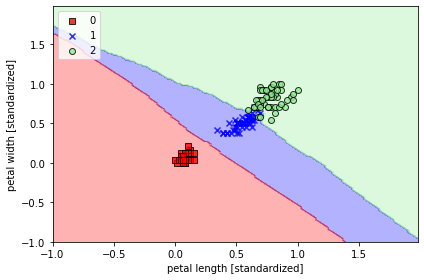

In [17]:
knn2 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

X = normalized_training_data[:,[2,3]] #all the rows of columns 3 and 4

knn2.fit(X,iris_data.target)

plot_decision_regions(X, iris_data.target, 
                      classifier=knn2)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Example: KNN for Spelling Correction

Here, we ask the KNN algorithm to correct misspellings such as Holpful (should be Helpful).  To do so, we use a British-English [list of words](https://www.python-course.eu/british-english.txt) that was modified from [another source](https://www.python-course.eu/k_nearest_neighbor_classifier.php). 

Here, the input are not real numbers, but strings.  _So we cannot use Scikit-Learn, even with a custom distance function._

In [18]:
words_df = pd.read_csv(r'data/british-english.txt', names=["word"])
words_df

,word
0,A
1,A's
2,AA's
3,AB's
4,ABM's
...,...
99151,épée's
99152,épées
99153,étude
99154,étude's


We will use the 'levenshtein' distance metric.  Check out [this video](https://www.youtube.com/watch?v=MiqoA-yF-0M) to learn more about the levenshtein distance, which measures the cost of changing one string to another given three basic operations: delete, replace, insert.  It shows how many changes are needed to get from string `s` to string `t`.  The following implementation comes from [here](https://www.python-course.eu/levenshtein_distance.php), where you'll find more clever implementations.

Note that in the following code uses [type annotations](https://dev.to/dstarner/using-pythons-type-annotations-4cfe), which can be summarized by the following two additions to a function definition:

- After the name of an input argument is defined in the function signature, it is followed by a colon and its data type - the general usage being: `<varName> : <varType>`.  For example, `myString : str`.  This is done to make the code clearer to read, and reveal it's purpose a little more.

- Also, an arrow followed by a data type is added to the end of the function signature. The general usage being: `<funcName(p1, ..., pn)> -> <returnVarType>`.  For example, `stringFunc(myStr : str) -> int` indicates a function that accepts one input parameter called `myStr` of type `str` that returns a value of `int` data type. This method more easily shows the return value types of any function or method, to avoid confusion by future developers!

Levenshtein calculates the the number of substitutions and deletions needed in order to transform one string into another one.

In [19]:
from typing import Dict, Tuple, List, Any, Callable

memo = dict()   # type: Dict[Tuple[str, str], int]
def levenshtein(s: str, t: str) -> int:
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    cost = 0 if s[-1] == t[-1] else 1

    i1 = (s[:-1], t)
    if i1 not in memo:
        memo[i1] = levenshtein(*i1)
    i2 = (s, t[:-1])
    if i2 not in memo:
        memo[i2] = levenshtein(*i2)
    i3 = (s[:-1], t[:-1])
    if i3 not in memo:
        memo[i3] = levenshtein(*i3)
    res = min([memo[i1] + 1, memo[i2] + 1, memo[i3] + cost])

    return res


A more general `get_neighbors()` that expects a distance function as an input.

In [20]:
def get_neighbors(training_set: List[Any],
                  labels: List[Any],
                  test_instance: Any,
                  k: int,
                  distance: Callable) -> List[Tuple[Any, float, Any]]:

    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

Weighted by distance.  We will show this for the sci-kit learn code as well

In [21]:
def vote_distance_weights(neighbors: List[Tuple[Any, float, Any]], all_results: bool = True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
    labels, votes = zip(*class_counter.most_common())
    # print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
            class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

Vote probability, unweighted by distance

In [22]:
def vote_prob(neighbors: List[Tuple[Any, float, Any]]):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common()[0][0]
    votes4winner = class_counter.most_common()[0][1]
    return winner, votes4winner/sum(votes)

In [23]:
# double check if there are any null values
print(words_df.isna().sum())

word    1
dtype: int64


In [24]:
# let's drop the bad values
words_df.dropna(inplace=True)
print(words_df.isna().sum())

word    0
dtype: int64


In [25]:
words = list(word.strip() for word in words_df["word"])
for word in ["datq", "sceince", "holpful", "kundnoss", "holpposs", "blagrufoo", "qwerasdfzx"]:
    print(f"{word:<10}:")
    k_neighbors = get_neighbors(words,
                                words,
                                word,
                                3,
                                distance=levenshtein)
    print(f"  neighbors: {[neighbor[1:] for neighbor in k_neighbors]}")
    print(f"  vote_distance_weights: {vote_distance_weights(k_neighbors, all_results=False)}")
    print(f"  vote_prob: {vote_prob(k_neighbors)}")


datq      :
  neighbors: [(1, 'data'), (1, 'date'), (2, 'Batu')]
  vote_distance_weights: ('data', 0.4166666666666667)
  vote_prob: ('data', 0.3333333333333333)
sceince   :
  neighbors: [(2, 'scene'), (2, 'science'), (2, 'sconce')]
  vote_distance_weights: ('scene', 0.3333333333333333)
  vote_prob: ('scene', 0.3333333333333333)
holpful   :
  neighbors: [(1, 'helpful'), (2, 'doleful'), (2, 'hopeful')]
  vote_distance_weights: ('helpful', 0.5555555555555556)
  vote_prob: ('helpful', 0.3333333333333333)
kundnoss  :
  neighbors: [(2, 'kindness'), (3, 'fondness'), (3, 'kudos')]
  vote_distance_weights: ('kindness', 0.5)
  vote_prob: ('kindness', 0.3333333333333333)
holpposs  :
  neighbors: [(3, 'helpless'), (3, "hippo's"), (3, 'hippos')]
  vote_distance_weights: ('helpless', 0.3333333333333333)
  vote_prob: ('helpless', 0.3333333333333333)
blagrufoo :
  neighbors: [(4, 'barefoot'), (5, 'Baguio'), (5, 'Blackfoot')]
  vote_distance_weights: ('barefoot', 0.4333333333333333)
  vote_prob: ('bare

# How to Choose K

By convention, many people try using `K = 5`.  But you should certainly perform a more scientific analysis.  The below code employs various `K` values and performs cross-validation using accuracy as the test metric.

In [26]:
from sklearn.model_selection import cross_val_score

#list starting at 1 abd ending at 29 and skipping by 2
num_neighbors = list(range(1,30,2))

# empty list that will hold cv scores
cv_scores = [ ]

#perform 10-fold cross-validation
for k in num_neighbors:
    knn4 = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    

    knn4.fit(normalized_training_data, iris_data.target)
    
    scores = cross_val_score(knn4, normalized_training_data, iris_data.target, cv=10, scoring='accuracy')
    
    cv_scores.append(scores.mean())

cv_scores

[0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.96,
 0.9600000000000002,
 0.9533333333333334,
 0.96,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.96]

    Accuracy
K           
1   0.953333
3   0.953333
5   0.953333
7   0.960000
9   0.960000
11  0.953333
13  0.960000
15  0.966667
17  0.966667
19  0.953333
21  0.953333
23  0.953333
25  0.946667
27  0.946667
29  0.960000


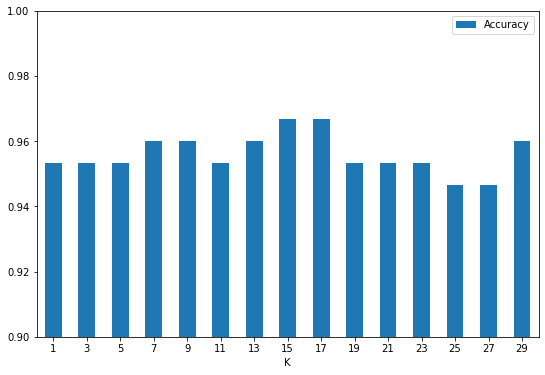

In [27]:
cv_scores_df = pd.DataFrame({"K": [k for k in num_neighbors], 
              "Accuracy": cv_scores}).set_index("K")
print(cv_scores_df)
cv_scores_df.plot.bar(figsize=(9,6), ylim=(0.9, 1.0), rot=0)
plt.show()

In [28]:
# Changing to misclassification error
mse = [1-x for x in cv_scores]

# determing best k
optimal_k = num_neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 15


# Distance-Weighted KNN

Perhaps a way to make the solution less sensitive to the 'right' choice of $k$ is to weight the value by distance.

If we pick $k=5$, and the nearest neighbors give labels of \[A, A, B, B, B\], we would be inclided to pick the majority class of B.

But what if the two A's were really close, and the three B's were somewhat further away?  We might pick A over B.

We can use the `weights='distance'` hyperparameter, which weights data points by the inverse of their distance.  In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

    Accuracy
K           
1   0.953333
3   0.953333
5   0.953333
7   0.953333
9   0.946667
11  0.953333
13  0.953333
15  0.960000
17  0.960000
19  0.953333
21  0.953333
23  0.953333
25  0.953333
27  0.953333
29  0.960000


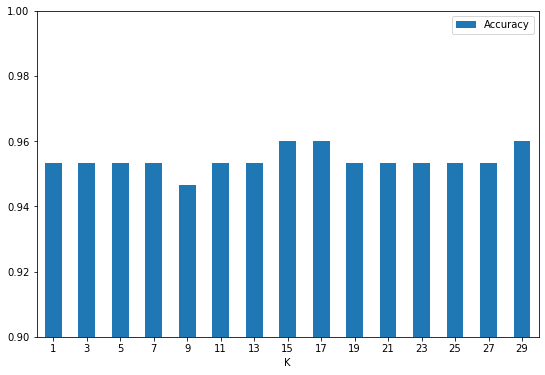

In [29]:
# empty list that will hold cv scores
cv_scores = [ ]

#perform 10-fold cross-validation
for k in num_neighbors:
    
    knn5 = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', weights='distance')
    

    knn5.fit(normalized_training_data, iris_data.target)
    
    #cross fold validation for our new model 
    scores = cross_val_score(knn5, normalized_training_data, iris_data.target, cv=10, scoring='accuracy')
    
    cv_scores.append(scores.mean())

cv_scores_df = pd.DataFrame({"K": [k for k in num_neighbors], 
                             "Accuracy": cv_scores}).set_index("K")
print(cv_scores_df)
cv_scores_df.plot.bar(figsize=(9,6), ylim=(0.9, 1.0), rot=0)
plt.show()

The 'optimal' $k$ is essentially the same.  But the overall graph is much smoother, justifying the idea that weighting might lead to less sensitivity in choosing $k$